In [1]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [ ]:
df = pd.read_csv(r'heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

C:\Users\my name\AppData\Local\Temp\ipykernel_6156\2810276222.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='bwr')


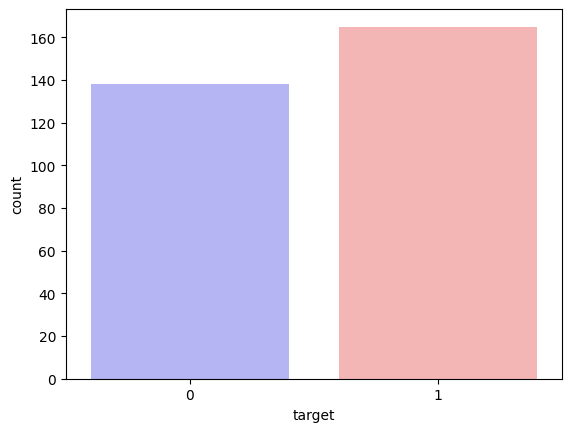

In [4]:
sns.countplot(x='target', data=df, palette='bwr')
plt.show()

In [ ]:
countNoDisease = len(df[df.target==0])
countHaveDisease = len(df[df.target==1])

print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease
/ (len(df.target))*100)))

print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease /
(len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


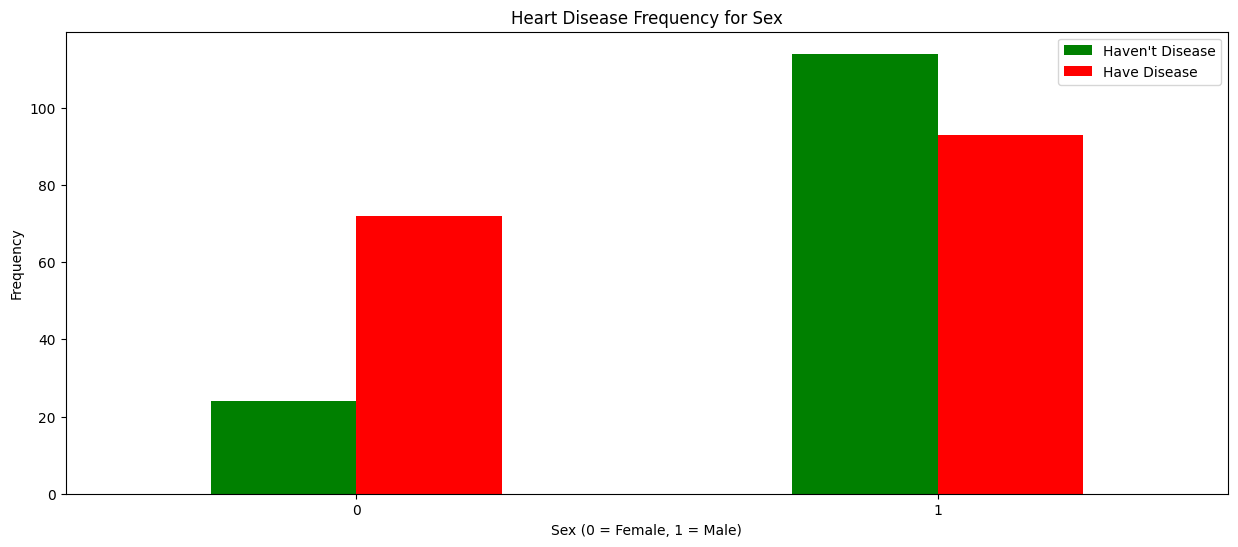

In [8]:
pd.crosstab(df.sex, df.target).plot(kind='bar', figsize=(15,6), color=['green',
'red'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

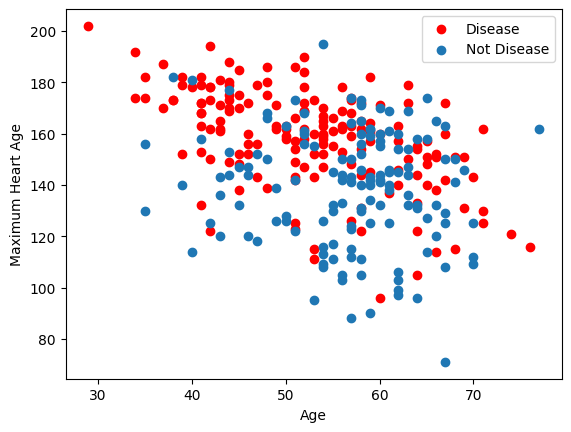

In [ ]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c='red')
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(['Disease', 'Not Disease'])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Age')
plt.show()

In [ ]:
a = pd.get_dummies(df['cp'], prefix='cp')
b = pd.get_dummies(df['thal'], prefix='thal')
c = pd.get_dummies(df['slope'], prefix='slope')
frames = [df, a, b, c]
df = pd.concat(frames, axis=1)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,False,False,True,False,True,False,False,True,False,False
1,37,1,2,130,250,0,1,187,0,3.5,...,False,True,False,False,False,True,False,True,False,False
2,41,0,1,130,204,0,0,172,0,1.4,...,True,False,False,False,False,True,False,False,False,True
3,56,1,1,120,236,0,1,178,0,0.8,...,True,False,False,False,False,True,False,False,False,True
4,57,0,0,120,354,0,1,163,1,0.6,...,False,False,False,False,False,True,False,False,False,True


In [11]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,False,False,True,False,True,False,False,True,False,False
1,37,1,130,250,0,1,187,0,3.5,0,...,False,True,False,False,False,True,False,True,False,False
2,41,0,130,204,0,0,172,0,1.4,0,...,True,False,False,False,False,True,False,False,False,True
3,56,1,120,236,0,1,178,0,0.8,0,...,True,False,False,False,False,True,False,False,False,True
4,57,0,120,354,0,1,163,1,0.6,0,...,False,False,False,False,False,True,False,False,False,True


In [12]:
X = df.drop(['target'], axis=1)
y = df['target']
X.columns



Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'ca', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1',
       'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2'],
      dtype='object')

In [13]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X.shape, X_train.shape, X_test.shape)

(303, 21) (242, 21) (61, 21)


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
acc_lr = round(lr.score(X_train, y_train)*100, 2)

print(str(acc_lr)+ ' Percentage')

86.36 Percentage


In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

acc_svc = round(svc.score(X_train, y_train)*100, 2)
print(str(acc_svc)+' Percentage')

66.53 Percentage


In [ ]:
from sklearn.neighbors import KNeighborsClassifier # Vared kardane model KNN

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
acc_knn = round(knn.score(X_train, y_train)*100, 2)

print(str(acc_knn)+' Percentage')

78.1 Percentage


In [ ]:
from sklearn.tree import DecisionTreeClassifier # Vared kardane model Derakhte Tasmim

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
acc_dt = round(dt.score(X_train, y_train)*100, 2)


print(str(acc_dt)+' Percentage')

100.0 Percentage


In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
acc_rf = round(rf.score(X_train, y_train)*100, 2)

print(str(acc_rf)+' Percentage')

100.0 Percentage


In [ ]:
from sklearn.naive_bayes import GaussianNB 

nb = GaussianNB()
nb.fit(X_train, y_train)
acc_nb = round(nb.score(X_train, y_train)*100, 2)

print(str(acc_nb)+' Percentage')

84.71 Percentage


In [26]:
models = pd.DataFrame({
'Models':['Logistic Regression', 'Support Vector', 'KNN', 'Decision Tree',
'Random Forest', 'Naive Bayes'],
'Score':[acc_lr, acc_svc, acc_knn, acc_dt, acc_rf, acc_nb] 
})

models.sort_values(by='Score', ascending=False)

,Models,Score
3,Decision Tree,100.00
4,Random Forest,100.00
0,Logistic Regression,86.36
5,Naive Bayes,84.71
2,KNN,78.10
1,Support Vector,66.53


In [27]:
from sklearn.metrics import accuracy_score 


lr_pred = lr.predict(X_test) # Logistic Regression
svm_pred = svc.predict(X_test) # Support Vector
knn_pred = knn.predict(X_test) # K-Nearest
dt_pred = dt.predict(X_test) # Decision Tree
rf_pred = rf.predict(X_test) # Random Forest
 
 
nb_pred = nb.predict(X_test) 

 
test_lr = round(accuracy_score(lr_pred, y_test)*100, 2)
test_svm = round(accuracy_score(svm_pred, y_test)*100, 2)
test_knn = round(accuracy_score(knn_pred, y_test)*100, 2)
test_dt = round(accuracy_score(dt_pred, y_test)*100, 2)


test_rf = round(accuracy_score(rf_pred, y_test)*100, 2)
test_nb = round(accuracy_score(nb_pred, y_test)*100, 2) 

 
test_models = pd.DataFrame({
'Models':['Logistic Regression', 'Support Vector', 'KNN', 'Decision Tree',
'Random Forest', 'Naive Bayes'],
'Score(Test Data)':[test_lr, test_svm, test_knn, test_dt, test_rf, test_nb]
})


test_models.sort_values(by='Score(Test Data)', ascending=False)

,Models,Score(Test Data)
4,Random Forest,86.89
5,Naive Bayes,86.89
0,Logistic Regression,85.25
3,Decision Tree,77.05
1,Support Vector,68.85
2,KNN,63.93


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 

print(classification_report(y_test, rf_pred))
cm = confusion_matrix(y_test, rf_pred)

cm

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



array([[23,  4],
       [ 4, 30]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

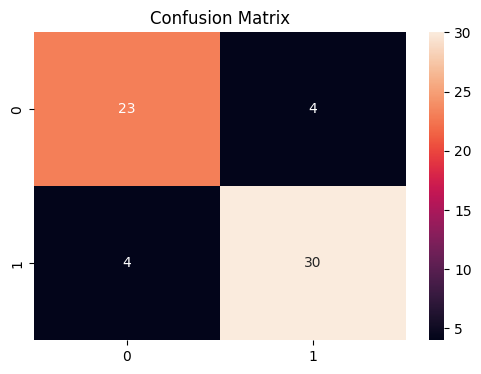

In [23]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')

In [ ]:
input_data = (34, 1, 140, 230, 0, 1, 170, 1, 3.2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1)

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = rf.predict(input_data_reshaped)

print(prediction)

[0]


c:\Users\my name\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [29]:
if (prediction[0] == 0):
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')

The Person does not have a Heart Disease
